### This is a notebook for comparing predicted segmentation with ground truth segmentations

In [5]:
import numpy as np
from cellpose import utils, dynamics, metrics
from numba import jit
from scipy.optimize import linear_sum_assignment
from scipy.ndimage import convolve, mean




### Loading of *_seg.npy files which contains 

In [4]:
import numpy as np
import glob
import re

# Path to directory containing .npy files
groundtruth_files_path = "../data/validation/groundtruth/"
predicted_files_path = "../data/validation/predictions/"

# Get list of all .npy files in the directory and sort them in numerical order
groundtruth_files = sorted(
    glob.glob(f"{groundtruth_files_path}/*.npy"),
    key=lambda x: int(x.split('_')[-3].lstrip('0') + x.split('_')[-2][2:].lstrip('0'))
)
predicted_files = sorted(
    glob.glob(f"{predicted_files_path}/*.npy"),
    key=lambda x: int(x.split('_')[-3].lstrip('0') + x.split('_')[-2][2:].lstrip('0'))
)

# Load each .npy file into a list and extract only the 'masks' field
groundtruth_list = [np.load(file, allow_pickle=True).item()['masks'] for file in groundtruth_files]
predicted_list = [np.load(file, allow_pickle=True).item()['masks'] for file in predicted_files]

print("Number of .npy files loaded:", len(groundtruth_list))

# Accessing the 'masks' directly from the lists
masks_true = groundtruth_list
masks_pred = predicted_list

#print(groundtruth_files[10])

#The file nr you want ot visualise
i = 13

tile = re.search(r'tile_\d{4}_\d{4}', groundtruth_files[i])
tile = tile.group()
print(tile)

Number of .npy files loaded: 20
tile_0029_0010


In [6]:
avr_precision = metrics.average_precision(masks_true, masks_pred)
#print("average precision:", avr_precision)


In [9]:

import matplotlib.pyplot as plt
!ls ../

Anton	     exploration.ipynb	notebooks  requirements.txt  tests
config.yaml  jobscripts		ona	   results	     validation
data	     LICENSE		README.md  src


## Making plots of all three models precision

In [10]:
import matplotlib.pyplot as plt
# Path to directory containing .npy files
groundtruth_files_path = "../data/validation/groundtruth/"
predicted_retrained_path = "../validation/retrained2_predictions/"
predicted_finetuned_path = "../data/validation_fine_cyto/fined_tuned_predictions/"
predicted_cyto3_path = "../data/validation_fine_cyto/cyto3_predictions/"

# Get list of all .npy files in the directory and sort them in numerical order
groundtruth_files = sorted(
    glob.glob(f"{groundtruth_files_path}/*.npy"),
    key=lambda x: int(x.split('_')[-3].lstrip('0') + x.split('_')[-2][2:].lstrip('0'))
)
predicted_retrained_files = sorted(
    glob.glob(f"{predicted_retrained_path}/*.npy"),
    key=lambda x: int(x.split('_')[-3].lstrip('0') + x.split('_')[-2][2:].lstrip('0'))
)

predicted_finetuned_files = sorted(
    glob.glob(f"{predicted_finetuned_path}/*.npy"),
    key=lambda x: int(x.split('_')[-3].lstrip('0') + x.split('_')[-2][2:].lstrip('0'))
)

predicted_cyto3_files = sorted(
    glob.glob(f"{predicted_cyto3_path}/*.npy"),
    key=lambda x: int(x.split('_')[-3].lstrip('0') + x.split('_')[-2][2:].lstrip('0'))
)

# Load each .npy file into a list and extract only the 'masks' field
groundtruth_list = [np.load(file, allow_pickle=True).item()['masks'] for file in groundtruth_files]
predicted_retrained_list = [np.load(file, allow_pickle=True).item()['masks'] for file in predicted_retrained_files]
predicted_finetuned_list = [np.load(file, allow_pickle=True).item()['masks'] for file in predicted_finetuned_files]
predicted_cyto3_list = [np.load(file, allow_pickle=True).item()['masks'] for file in predicted_cyto3_files]

print("Number of .npy files loaded:", len(groundtruth_list))

# Accessing the 'masks' directly from the lists
masks_true = groundtruth_list
masks_retrained = predicted_retrained_list
masks_finetuned = predicted_finetuned_list
masks_cyto3 = predicted_cyto3_list

Number of .npy files loaded: 20


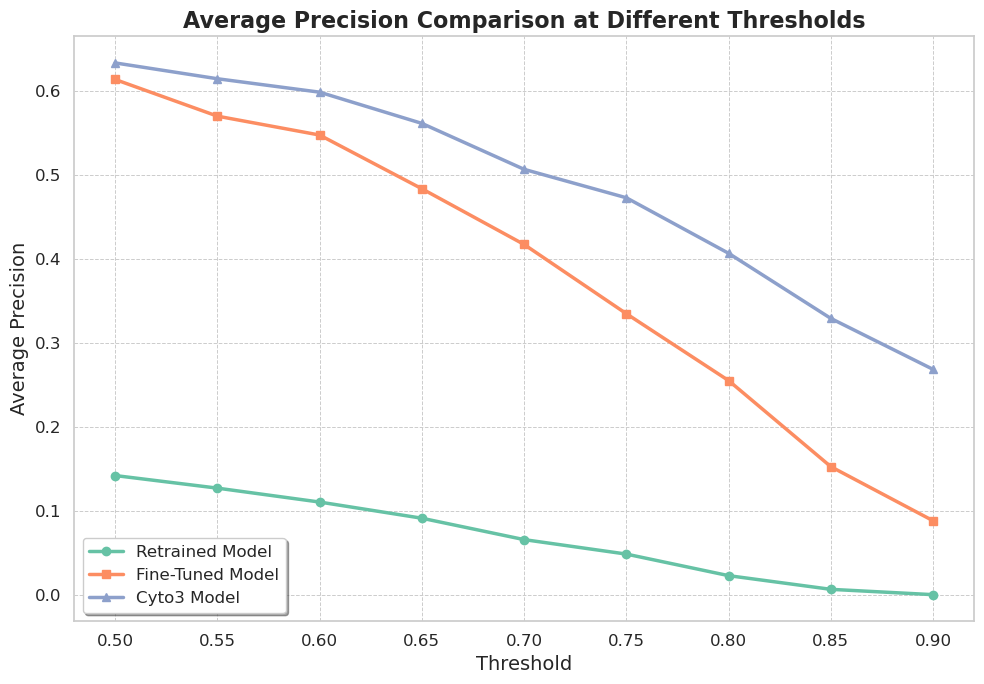

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cellpose import metrics

# Assuming you already have these lists defined
# masks_true = groundtruth_list
# masks_retrained = predicted_retrained_list
# masks_finetuned = predicted_finetuned_list
# masks_cyto3 = predicted_cyto3_list
thresholds = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
# Compute average precision for each prediction set
avr_precision_retrained = metrics.average_precision(masks_true, masks_retrained, thresholds)
avr_precision_finetuned = metrics.average_precision(masks_true, masks_finetuned, thresholds)
avr_precision_cyto3 = metrics.average_precision(masks_true, masks_cyto3, thresholds)

# Extract precision values
precision_retrained = np.mean(avr_precision_retrained[0], axis=0)
precision_finetuned = np.mean(avr_precision_finetuned[0], axis=0)
precision_cyto3 = np.mean(avr_precision_cyto3[0], axis=0)

# Thresholds used for evaluation


# Set up the plot with Seaborn styling
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set2")

plt.figure(figsize=(10, 7))

# Plot precision for each model
plt.plot(thresholds, precision_retrained, marker='o', label='Retrained Model', color=palette[0], linewidth=2.5)
plt.plot(thresholds, precision_finetuned, marker='s', label='Fine-Tuned Model', color=palette[1], linewidth=2.5)
plt.plot(thresholds, precision_cyto3, marker='^', label='Cyto3 Model', color=palette[2], linewidth=2.5)

# Add labels, title, and legend
plt.title('Average Precision Comparison at Different Thresholds', fontsize=16, weight='bold')
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Average Precision', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=12, frameon=True, shadow=True)
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.7)

# Save and show the plot
plt.tight_layout()
plt.show()